In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.shape

(19237, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [6]:
df.columns.shape  #shape of columns

(18,)

In [7]:
df.shape[0]      # shape of rows

19237

# ----------------------------------------------  EDA  -----------------------------------------------------

Identification of variable and datatypes
algorithm wise EDA is defferent
I have done basic EDA : 1. we have to check missing values. we have to handle those missing values.
                        2. for continuous values we use (mean,median,mode,KNN imputers), for catrogrical values we use **mode**
                        3. Check Datatypes
                        4. Info>>pandas.core.frame.DataFrame' using info we find non-null values count and all columns datatype
                        5. check unique values
                        6. **Univariate analysis >> Using distplot,histplot,countplot**
                        7. **how to do bivariate analysis >> by using Pariplot(sns),scatterplot(sns),plot(pd),heatmap(sns)**
                        8. Data Distribution Skewness
                        9. How to handle skewness >> Column transformation,log,cuberoot,squareroot,reciprocal.
                       
                        

In [8]:
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


### 1. ID

In [9]:
df["ID"].unique()

array([45654403, 44731507, 45774419, ..., 45804997, 45793526, 45813273],
      dtype=int64)

In [10]:
df.shape

(19237, 18)

In [11]:
df["ID"].unique().shape[0] - df.shape[0]

-313

In [12]:
df.drop("ID",axis=1,inplace=True)
df.head(1)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


### 2. Price

**This is my target columns**

In [13]:
df["Price"].unique()

array([13328, 16621,  8467, ..., 56814, 63886, 22075], dtype=int64)

In [14]:
df["Price"].unique().shape[0]

2315

In [15]:
df["Price"].isna().sum()

0

In [16]:
df["Price"].dtype

dtype('int64')

### 3. Levy

In [17]:
df["Levy"].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [18]:
df["Levy"].replace({"-":np.nan},inplace=True)

In [19]:
df["Levy"].isna().sum()

5819

In [20]:
(df["Levy"].fillna(df["Levy"].median(),inplace=True))

In [21]:
df["Levy"].value_counts().head()

781.0    5819
765       486
891       461
639       410
640       405
Name: Levy, dtype: int64

In [22]:
df["Levy"] = df["Levy"].astype(float).astype(int)

In [23]:
df["Levy"].dtype

dtype('int32')

In [24]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### 4. Manufacturer

In [25]:
df["Manufacturer"].dtype

dtype('O')

In [26]:
df["Manufacturer"].unique()[1:10]

array(['CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA', 'MERCEDES-BENZ',
       'OPEL', 'PORSCHE', 'BMW'], dtype=object)

In [27]:
df["Manufacturer"].nunique()

65

In [28]:
df["Manufacturer"].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [29]:
df["Manufacturer"].value_counts().head(2)

HYUNDAI    3769
TOYOTA     3662
Name: Manufacturer, dtype: int64

In [30]:
ohe = OneHotEncoder()
array = ohe.fit_transform(df[["Manufacturer"]]).toarray()
df1 = pd.DataFrame(array,columns=df["Manufacturer"].unique())
df1.head()

,LEXUS,CHEVROLET,HONDA,FORD,HYUNDAI,TOYOTA,MERCEDES-BENZ,OPEL,PORSCHE,BMW,...,MOSKVICH,MASERATI,FERRARI,SAAB,LAMBORGHINI,ROLLS-ROYCE,PONTIAC,SATURN,ASTON MARTIN,GREATWALL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df = df.join(df1)

In [32]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,MOSKVICH,MASERATI,FERRARI,SAAB,LAMBORGHINI,ROLLS-ROYCE,PONTIAC,SATURN,ASTON MARTIN,GREATWALL
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.drop("Manufacturer",axis=1,inplace=True)

In [34]:
df.head()

,Price,Levy,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,MOSKVICH,MASERATI,FERRARI,SAAB,LAMBORGHINI,ROLLS-ROYCE,PONTIAC,SATURN,ASTON MARTIN,GREATWALL
0,13328,1399,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16621,1018,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,781,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,862,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11726,446,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Model

In [35]:
df["Model"].dtype

dtype('O')

In [36]:
df["Model"].isna().sum()

0

In [37]:
df["Model"].unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

In [38]:
df["Model"].nunique()

1590

In [39]:
df["Model"].value_counts().head()

Prius      1083
Sonata     1079
Camry       938
Elantra     922
E 350       542
Name: Model, dtype: int64

In [40]:
# df.corr()

In [41]:
ohe = OneHotEncoder()
array = ohe.fit_transform(df[["Model"]]).toarray()
df2 = pd.DataFrame(array,columns=df["Model"].unique())
df2.head()

,RX 450,Equinox,FIT,Escape,Santa FE,Prius,Sonata,Camry,RX 350,E 350,...,C 240 W 203,Vito Extralong,E 500 AVG,530 i,FIT LX,Every Landy NISSAN SEREN,CL 600,E 230 124,RX 450 F SPORT,Prius C aqua
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df = df.join(df2)

In [43]:
df.head()

,Price,Levy,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,C 240 W 203,Vito Extralong,E 500 AVG,530 i,FIT LX,Every Landy NISSAN SEREN,CL 600,E 230 124,RX 450 F SPORT,Prius C aqua
0,13328,1399,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16621,1018,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,781,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,862,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11726,446,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df.drop("Model",axis=1,inplace=True)

In [45]:
df.head(1)

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,...,C 240 W 203,Vito Extralong,E 500 AVG,530 i,FIT LX,Every Landy NISSAN SEREN,CL 600,E 230 124,RX 450 F SPORT,Prius C aqua
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6. Prod Year

In [46]:
df.rename(columns = {"Prod. year": "Prod_year"},inplace=True)

In [47]:
df["Prod_year"].dtype

dtype('int64')

In [48]:
df["Prod_year"].isna().sum()

0

In [49]:
df["Prod_year"].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1965, 1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973],
      dtype=int64)

### 7. Category

In [50]:
df["Category"].dtype

dtype('O')

In [51]:
df["Category"].isna().sum()

0

In [52]:
df["Category"].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [53]:
ohe = OneHotEncoder()

In [54]:
array = ohe.fit_transform(df[["Category"]]).toarray()
df3 = pd.DataFrame(array,columns=df["Category"].unique())
df3.head()

,Jeep,Hatchback,Sedan,Microbus,Goods wagon,Universal,Coupe,Minivan,Cabriolet,Limousine,Pickup
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df = df.join(df3)

In [56]:
df.head(1)

,Price,Levy,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,...,Hatchback,Sedan,Microbus,Goods wagon,Universal,Coupe,Minivan,Cabriolet,Limousine,Pickup
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df.drop("Category",axis=1,inplace=True)

In [58]:
df.head(1)

,Price,Levy,Prod_year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,...,Hatchback,Sedan,Microbus,Goods wagon,Universal,Coupe,Minivan,Cabriolet,Limousine,Pickup
0,13328,1399,2010,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df.shape

(19237, 1680)

### 8. Leather Interior

In [60]:
df["Leather interior"].dtype

dtype('O')

In [61]:
df["Leather interior"].isna().sum()

0

In [62]:
df["Leather interior"].unique()

array(['Yes', 'No'], dtype=object)

In [63]:
df["Leather interior"].replace({"Yes":1,"No":0},inplace=True)
df["Leather interior"].unique()

array([1, 0], dtype=int64)

In [64]:
df.head(1)

,Price,Levy,Prod_year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,...,Hatchback,Sedan,Microbus,Goods wagon,Universal,Coupe,Minivan,Cabriolet,Limousine,Pickup
0,13328,1399,2010,1,Hybrid,3.5,186005 km,6.0,Automatic,4x4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 9. Fuel type

In [65]:
df["Fuel type"].dtype

dtype('O')

In [66]:
df["Fuel type"].isna().sum()

0

In [67]:
df["Fuel type"].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [68]:
ohe = OneHotEncoder()
array = ohe.fit_transform(df[["Fuel type"]]).toarray()
df4 = pd.DataFrame(array,columns=df["Fuel type"].unique())

In [69]:
df4.head()

,Hybrid,Petrol,Diesel,CNG,Plug-in Hybrid,LPG,Hydrogen
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
df = df.join(df4)

In [71]:
df.drop("Fuel type",axis=1,inplace=True)

In [72]:
df.head(1)

,Price,Levy,Prod_year,Leather interior,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,...,Cabriolet,Limousine,Pickup,Hybrid,Petrol,Diesel,CNG,Plug-in Hybrid,LPG,Hydrogen
0,13328,1399,2010,1,3.5,186005 km,6.0,Automatic,4x4,04-May,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 10. Engine volume

In [73]:
df["Engine volume"].dtype

dtype('O')

In [74]:
df["Engine volume"].isna().sum()

0

In [75]:
df["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [76]:
df5 = df["Engine volume"].str.split(expand=True)

In [77]:
df5.head()

,0,1
0,3.5,None
1,3,None
2,1.3,None
3,2.5,None
4,1.3,None


In [78]:
df5.columns = ["Engine vol","Turbo"]

In [79]:
df5.head()

,Engine vol,Turbo
0,3.5,None
1,3,None
2,1.3,None
3,2.5,None
4,1.3,None


In [80]:
df5["Engine vol"].isna().sum()

0

In [81]:
df5.drop("Turbo",axis=1,inplace=True)
df5.head()

,Engine vol
0,3.5
1,3
2,1.3
3,2.5
4,1.3


In [82]:
df5["Engine vol"] = df5["Engine vol"].astype(float)

In [83]:
df = df.join(df5)

In [84]:
df.drop("Engine volume",axis=1,inplace=True)

In [85]:
df.head()

,Price,Levy,Prod_year,Leather interior,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,...,Limousine,Pickup,Hybrid,Petrol,Diesel,CNG,Plug-in Hybrid,LPG,Hydrogen,Engine vol
0,13328,1399,2010,1,186005 km,6.0,Automatic,4x4,04-May,Left wheel,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.5
1,16621,1018,2011,0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
2,8467,781,2006,0,200000 km,4.0,Variator,Front,04-May,Right-hand drive,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.3
3,3607,862,2011,1,168966 km,4.0,Automatic,4x4,04-May,Left wheel,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.5
4,11726,446,2014,1,91901 km,4.0,Automatic,Front,04-May,Left wheel,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.3


### 11.Mileage

In [86]:
df["Mileage"].dtype

dtype('O')

In [87]:
df["Mileage"].nunique()

7687

In [88]:
df["Mileage"].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [89]:
df6 = df["Mileage"].str.split(expand=True)

In [90]:
df6.head()


,0,1
0,186005,km
1,192000,km
2,200000,km
3,168966,km
4,91901,km


In [91]:
df6.drop(1,axis=1,inplace=True)
df6.head()

,0
0,186005
1,192000
2,200000
3,168966
4,91901


In [92]:
df6.columns = ["km"]
df6.head()

,km
0,186005
1,192000
2,200000
3,168966
4,91901


In [93]:
df = df.join(df6)

In [94]:
df.drop("Mileage",axis=1,inplace=True)

In [95]:
df.head(1)

,Price,Levy,Prod_year,Leather interior,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,...,Pickup,Hybrid,Petrol,Diesel,CNG,Plug-in Hybrid,LPG,Hydrogen,Engine vol,km
0,13328,1399,2010,1,6.0,Automatic,4x4,04-May,Left wheel,Silver,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.5,186005


In [96]:
df["km"]=df["km"].astype(int)

In [97]:
df["km"].dtype

dtype('int32')

### 12 Cylinders

In [98]:
df["Cylinders"].dtype

dtype('float64')

In [99]:
df["Cylinders"].isna().sum()

0

In [100]:
df["Cylinders"].unique()

array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

In [101]:
df["Cylinders"].nunique()

13

In [102]:
df["Cylinders"] = df["Cylinders"].astype(int)

In [103]:
df["Cylinders"].dtype

dtype('int32')

In [104]:
df["Cylinders"].unique()

array([ 6,  4,  8,  1, 12,  3,  2, 16,  5,  7,  9, 10, 14])

In [105]:
df.columns

Index(['Price', 'Levy', 'Prod_year', 'Leather interior', 'Cylinders',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       ...
       'Pickup', 'Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen', 'Engine vol', 'km'],
      dtype='object', length=1686)

### 13. Gear box type

In [106]:
df["Gear box type"].dtype

dtype('O')

In [107]:
df["Gear box type"].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [108]:
label_enc = LabelEncoder()
df["Gear box type"] = label_enc.fit_transform(df["Gear box type"])

In [109]:
df["Gear box type"].unique()

array([0, 2, 3, 1])

In [110]:
df["Gear box type"].dtype

dtype('int32')

In [111]:
df["Gear box type"].isna().sum()

0

### 14. Drive Wheels

In [112]:
df["Drive wheels"].dtype

dtype('O')

In [113]:
df["Drive wheels"].isna().sum()

0

In [114]:
df["Drive wheels"].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [115]:
label_enc = LabelEncoder()
df["Drive wheels"] = label_enc.fit_transform(df["Drive wheels"])

In [116]:
df["Drive wheels"].unique()

array([0, 1, 2])

In [117]:
df["Drive wheels"].dtype

dtype('int32')

### 15. Doors

In [118]:
df["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [119]:
df["Doors"].nunique()

3

In [120]:
label_enc = LabelEncoder()
df["Doors"] = label_enc.fit_transform(df["Doors"])

In [121]:
df["Doors"].unique()

array([1, 0, 2])

In [122]:
df["Doors"].dtype

dtype('int32')

### 16. Wheels

In [123]:
df["Wheel"].dtype

dtype('O')

In [124]:
df["Wheel"].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [125]:
df["Wheel"].isnull().sum()

0

In [126]:
label_enc = LabelEncoder()
df["Wheel"] = label_enc.fit_transform(df["Wheel"])

In [127]:
df["Wheel"].unique()

array([0, 1])

In [128]:
df["Wheel"].dtype

dtype('int32')

### 17. Color

In [129]:
df["Color"].dtype

dtype('O')

In [130]:
df["Color"].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

In [131]:
label_enc = LabelEncoder()
df["Color"] = label_enc.fit_transform(df["Color"])

In [132]:
df["Color"].unique()

array([12,  1, 14,  7,  2,  6, 11, 13,  8, 15,  3,  5,  0,  4, 10,  9])

In [133]:
df["Color"].dtype

dtype('int32')

### 18. Airbags

In [134]:
df["Airbags"].dtype

dtype('int64')

In [135]:
df["Airbags"].unique()

array([12,  8,  2,  0,  4,  6, 10,  3,  1, 16,  5,  7,  9, 11, 14, 15, 13],
      dtype=int64)

In [136]:
df["Airbags"].head()

0    12
1     8
2     2
3     0
4     4
Name: Airbags, dtype: int64

<AxesSubplot: >

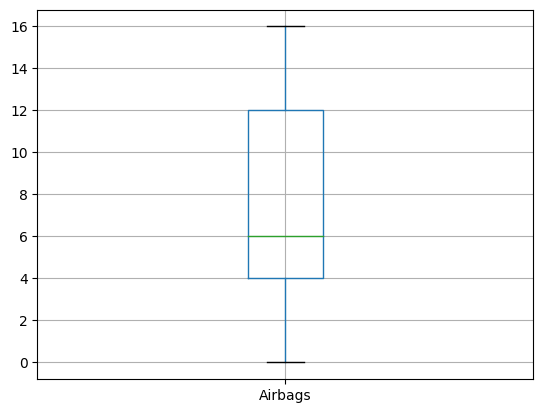

In [137]:
df.boxplot("Airbags")

In [138]:
df.head()

,Price,Levy,Prod_year,Leather interior,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,...,Pickup,Hybrid,Petrol,Diesel,CNG,Plug-in Hybrid,LPG,Hydrogen,Engine vol,km
0,13328,1399,2010,1,6,0,0,1,0,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.5,186005
1,16621,1018,2011,0,6,2,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,192000
2,8467,781,2006,0,4,3,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.3,200000
3,3607,862,2011,1,4,0,0,1,0,14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.5,168966
4,11726,446,2014,1,4,0,1,1,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.3,91901
